<h1 style="color:MidnightBlue; opacity: 0.8; font-size:250%; text-align:center; border-radius:7px;">PySpark Basics with Titanic Dataset</h1>


* [<span style="color:LightCoral"><font size="5">Selamlar!!</font></span>](#0)


* [<span style="color:LightCoral"><font size="5">Gerekli Kütüphanelerin Yüklenmesi (Imports etc.)</font></span>](#1)


* [<span style="color:LightCoral"><font size="5">Datasetin Okunması (spark.read.csv())</font></span>](#2)


* [<span style="color:LightCoral"><font size="5">İki Ayrı Datasetin Birleştirilmesi (unionByName())</font></span>](#3)


* [<span style="color:LightCoral"><font size="5">Info (printSchema())</font></span>](#4)


* [<span style="color:LightCoral"><font size="5">Missing Values (SQL Functions)</font></span>](#5)

    - [<span style="color:#9C27B0; opacity:1"><font size="4">Sadece Bir Sütun için Missing Values</font></span>](#5.1)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">Bütün Dataset için Missing Values</font></span>](#5.2)
 
* [<span style="color:LightCoral"><font size="5">GroupBy()</font></span>](#6)


* [<span style="color:LightCoral"><font size="5">NaN Value'ları Doldurma (fillna() / na.fill())</font></span>](#7)


* [<span style="color:LightCoral"><font size="5">Yeni Sütun Ekleme "Unvan" (withColumn())</font></span>](#8)


* [<span style="color:LightCoral"><font size="5">PySpark'ta value_counts()</font></span>](#9)


* [<span style="color:LightCoral"><font size="5">PySpark'ta unique()</font></span>](#10)


* [<span style="color:LightCoral"><font size="5">DataFrame Oluşturma and Replace</font></span>](#11)


* [<span style="color:LightCoral"><font size="5">GroupedData Mean ve Median</font></span>](#12)


* [<span style="color:LightCoral"><font size="5">Yeni Sütun Ekleme "Family" (withColumn())</font></span>](#13)


* [<span style="color:LightCoral"><font size="5">Özel Condition ile NaN Valueları Dolduralım</font></span>](#14)


* [<span style="color:LightCoral"><font size="5">Get Dummy Fonksiyonu (Indexer+Encoder+Assembler)</font></span>](#15)


* [<span style="color:LightCoral"><font size="5">Model Train</font></span>](#16)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">limit() İle Datayı Bölmek</font></span>](#16.1)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">randomSplit() İle Datayı Ayırmak</font></span>](#16.2)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">LogisticRegression Model</font></span>](#16.3)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">DecisionTreeClassifier Model</font></span>](#16.4)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">RandomForestClassifier Model</font></span>](#16.5)
    
    
* [<span style="color:LightCoral"><font size="5">Sonuç</font></span>](#17)

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Merhaba</font></span> <a id="0"> </a>
### Bu notebook Pyspark kütüphanesinin syntax yani yazımını ve kullanımı öğrenmeye yöneliktir.
#### Jupyter Notebook ile Nasıl Pyspark kullanılır?<br>
[YouTube Linki İçin Tıklayınız](https://www.youtube.com/watch?v=DznteGdeJoA)
### **December 10th, 2021**

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Installing and Importing Necessary Libraries</font></span><a id="1"> </a>

In [1]:
#pip install pyspark

In [2]:
#pip install findspark

In [1]:
import pyspark

In [2]:
import findspark
findspark.init()
findspark.find()

'C:\\spark-3.2.1-bin-hadoop3.2'

In [3]:
# Uyarıları ignore yani göz ardı edelim
import warnings
warnings.filterwarnings("ignore")

# Pyspark kütüphaneimizi "classification" tabanlı olarak yükleyip import edelim
# Spark session yapmak için detaylı bilgileri buradan veya google'dan öğrenebilrsiniz:
# https://pretagteam.com/question/making-spark-session   
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Classification').getOrCreate()

# pyspark.sql.functions listesi --> https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html#module-pyspark.sql.functions
# pyspark kütüphanesinin machine learning feature'ları hakkında detaylı bilgi için --> https://spark.apache.org/docs/latest/ml-features
from pyspark.sql import functions as F
from pyspark.ml.feature import *

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Reading Datasets</font></span><a id="2"> </a>

In [4]:
# Pyspark ile .csv uzantılı dosyaların okunuşu
# titanic veri setleri --> https://www.kaggle.com/c/titanic/data
df1 = spark.read.csv("ttrain.csv",inferSchema=True, header=True)
df2 = spark.read.csv("ttest.csv",inferSchema=True, header=True)

In [5]:
df1.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [6]:
df2.show()

+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|        892|     3|    Kelly, Mr. James|  male|34.5|    0|    0|          330911| 7.8292| null|       Q|
|        893|     3|Wilkes, Mrs. Jame...|female|47.0|    1|    0|          363272|    7.0| null|       S|
|        894|     2|Myles, Mr. Thomas...|  male|62.0|    0|    0|          240276| 9.6875| null|       Q|
|        895|     3|    Wirz, Mr. Albert|  male|27.0|    0|    0|          315154| 8.6625| null|       S|
|        896|     3|Hirvonen, Mrs. Al...|female|22.0|    1|    1|         3101298|12.2875| null|       S|
|        897|     3|Svensson, Mr. Joh...|  male|14.0|    0|    0|            7538|  9.225| null|       S|
|        898|     3|Connolly, Miss. Kate|femal

Pyspark'ta pandas gibi index slicing olarak köşeli parantez ile işlem yapamıyoruz.<br>
DataFrame'leri ise aşağıdaki syntax ile birleştirebiliriz.

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">How to Combine 2 Different Datasets</font></span><a id="3"> </a>

In [7]:
# allowMissingColumns parametresi kayıp column (sütunlara) izin veriyor.
# yani 11 ve 12 sütunlu iki ayrı dataframe i 12 sütun halinde birleştiriyor. NaN ile dolduruyor.
df = df1.unionByName(df2, allowMissingColumns=True)

In [8]:
# satır = df.count()
# sütun = len(df.columns)
print('Bu datasette {satır} adet satır ve {sütun} adet sütun vardır'.format(satır=df.count(), sütun=len(df.columns)))

Bu datasette 1309 adet satır ve 12 adet sütun vardır


Peki neden bu datasetleri birleştirdik?
    
- Burada amaç iki datasetinin birleştirilmesini öğrenmek.

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">How to Check Info</font></span><a id="4"> </a>

In [9]:
# info = df.printSchema()
df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">How to Check Missing Values</font></span><a id="5"> </a>

[Pyspark filter rows with null values](https://sparkbyexamples.com/pyspark/pyspark-filter-rows-with-null-values/)

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">For 1 Column</font></span> <a id="5.1"></a>

In [10]:
# First Way --> Just with 1 condition
df.filter("Survived is NULL").show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|        892|    null|     3|    Kelly, Mr. James|  male|34.5|    0|    0|          330911| 7.8292| null|       Q|
|        893|    null|     3|Wilkes, Mrs. Jame...|female|47.0|    1|    0|          363272|    7.0| null|       S|
|        894|    null|     2|Myles, Mr. Thomas...|  male|62.0|    0|    0|          240276| 9.6875| null|       Q|
|        895|    null|     3|    Wirz, Mr. Albert|  male|27.0|    0|    0|          315154| 8.6625| null|       S|
|        896|    null|     3|Hirvonen, Mrs. Al...|female|22.0|    1|    1|         3101298|12.2875| null|       S|
|        897|    null|     3|Svensson, Mr. Joh...|  male|14.0|    0|    0|      

In [11]:
# Second Way --> Just with 1 condition
df.filter(df.Survived.isNull()).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|        892|    null|     3|    Kelly, Mr. James|  male|34.5|    0|    0|          330911| 7.8292| null|       Q|
|        893|    null|     3|Wilkes, Mrs. Jame...|female|47.0|    1|    0|          363272|    7.0| null|       S|
|        894|    null|     2|Myles, Mr. Thomas...|  male|62.0|    0|    0|          240276| 9.6875| null|       Q|
|        895|    null|     3|    Wirz, Mr. Albert|  male|27.0|    0|    0|          315154| 8.6625| null|       S|
|        896|    null|     3|Hirvonen, Mrs. Al...|female|22.0|    1|    1|         3101298|12.2875| null|       S|
|        897|    null|     3|Svensson, Mr. Joh...|  male|14.0|    0|    0|      

In [12]:
# Third Way --> Fourth Wayfrom pyspark.sql.functions 
df.filter(F.col("Survived").isNull()).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|        892|    null|     3|    Kelly, Mr. James|  male|34.5|    0|    0|          330911| 7.8292| null|       Q|
|        893|    null|     3|Wilkes, Mrs. Jame...|female|47.0|    1|    0|          363272|    7.0| null|       S|
|        894|    null|     2|Myles, Mr. Thomas...|  male|62.0|    0|    0|          240276| 9.6875| null|       Q|
|        895|    null|     3|    Wirz, Mr. Albert|  male|27.0|    0|    0|          315154| 8.6625| null|       S|
|        896|    null|     3|Hirvonen, Mrs. Al...|female|22.0|    1|    1|         3101298|12.2875| null|       S|
|        897|    null|     3|Svensson, Mr. Joh...|  male|14.0|    0|    0|      

In [13]:
# Second Way --> Combine more than 1 conditions
df.filter("Survived is NULL and Fare is NULL").show()

+-----------+--------+------+------------------+----+----+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|              Name| Sex| Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+------------------+----+----+-----+-----+------+----+-----+--------+
|       1044|    null|     3|Storey, Mr. Thomas|male|60.5|    0|    0|  3701|null| null|       S|
+-----------+--------+------+------------------+----+----+-----+-----+------+----+-----+--------+



# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">For Entire Dataset</font></span> <a id="5.2"></a>

In [14]:
# First Way (side by side)
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|     418|     0|   0|  0|263|    0|    0|     0|   1| 1014|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



In [16]:
# First Way (one after the other)
for column in df.columns:
    df.select([F.count(F.when(F.isnull(column), column)).alias(column)]).show()

+-----------+
|PassengerId|
+-----------+
|          0|
+-----------+

+--------+
|Survived|
+--------+
|     418|
+--------+

+------+
|Pclass|
+------+
|     0|
+------+

+----+
|Name|
+----+
|   0|
+----+

+---+
|Sex|
+---+
|  0|
+---+

+---+
|Age|
+---+
|263|
+---+

+-----+
|SibSp|
+-----+
|    0|
+-----+

+-----+
|Parch|
+-----+
|    0|
+-----+

+------+
|Ticket|
+------+
|     0|
+------+

+----+
|Fare|
+----+
|   1|
+----+

+-----+
|Cabin|
+-----+
| 1014|
+-----+

+--------+
|Embarked|
+--------+
|       2|
+--------+



In [17]:
# Second Way (Creating def)

import pyspark.sql.functions as F
def count_missings(spark_df,sort=True):
    """
    Counts number of nulls and nans in each column
    """
    df = spark_df.select([F.count(F.when(F.isnan(c) | F.isnull(c), c)).alias(c) for (c,c_type) in spark_df.dtypes if c_type not in ('timestamp', 'string', 'date')]).toPandas()

    if len(df) == 0:
        print("There are no any missing values!")
        return None

    if sort:
        return df.rename(index={0: 'count'}).T.sort_values("count",ascending=False)

    return df

In [18]:
count_missings(df)  # Sort edilmiş

,count
Survived,418
Age,263
Fare,1
PassengerId,0
Pclass,0
SibSp,0
Parch,0


In [19]:
count_missings(df, False)  # Sort edilmemiş

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,418,0,263,0,0,1


In [20]:
# Third Way (with dict)

null_counter = {cols:df.filter(df[cols].isNull()).count() for cols in df.columns}
null_counter

{'PassengerId': 0,
 'Survived': 418,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 263,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 1,
 'Cabin': 1014,
 'Embarked': 2}

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Usage of groupBy()</font></span> <a id="6"></a>

Bildiğiniz üzere groupby fonksiyonu aggregate fonksiyonlar ile kullanılır.<br>
Pyspark kütüphanesinin GroupedData aggregate fonksiyonlarından bazıları:<br>
avg | count | max | min | mean<br>
Daha ayrıntlı GroupedData detaylar için --> https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.GroupedData.htmlaggregate<br>
Tüm aggregate fonksiyonlar için --> https://sparkbyexamples.com/pyspark/pyspark-aggregate-functions/

In [21]:
df.groupBy("Sex").mean().show()

+------+-----------------+-------------------+------------------+-----------------+------------------+------------------+------------------+
|   Sex| avg(PassengerId)|      avg(Survived)|       avg(Pclass)|         avg(Age)|        avg(SibSp)|        avg(Parch)|         avg(Fare)|
+------+-----------------+-------------------+------------------+-----------------+------------------+------------------+------------------+
|female|  648.18669527897| 0.7420382165605095|2.1545064377682404|28.68708762886598|0.6523605150214592|0.6330472103004292| 46.19809656652358|
|  male|658.7663107947806|0.18890814558058924| 2.372479240806643|30.58522796352584|0.4139976275207592|0.2479240806642942|26.154600831353914|
+------+-----------------+-------------------+------------------+-----------------+------------------+------------------+------------------+



In [22]:
df.groupBy("Fare").sum().show()

+-------+----------------+-------------+-----------+--------+----------+----------+---------+
|   Fare|sum(PassengerId)|sum(Survived)|sum(Pclass)|sum(Age)|sum(SibSp)|sum(Parch)|sum(Fare)|
+-------+----------------+-------------+-----------+--------+----------+----------+---------+
| 8.5167|            1800|            1|          6|   16.42|         1|         2|  17.0334|
|   15.5|            5277|            3|         30|    72.0|         8|         2|    155.0|
| 133.65|             996|            2|          2|    50.0|         3|         0|    267.3|
| 29.125|            3089|            0|         18|    70.0|        20|        10|   174.75|
|10.4625|             458|            0|          6|    31.0|         1|         2|   20.925|
| 7.0458|             478|            0|          3|    29.0|         1|         0|   7.0458|
|  9.475|              41|            0|          3|    40.0|         1|         0|    9.475|
|11.1333|            1052|            3|          9|    32.0

In [23]:
df.groupBy("Embarked").count().show()

+--------+-----+
|Embarked|count|
+--------+-----+
|       Q|  123|
|    null|    2|
|       C|  270|
|       S|  914|
+--------+-----+



# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">How to Fill NaN Values</font></span> <a id="7"></a>

In [24]:
df = df.fillna({"Embarked" : "S"})

In [25]:
df.groupBy("Embarked").count().show()

+--------+-----+
|Embarked|count|
+--------+-----+
|       Q|  123|
|       C|  270|
|       S|  916|
+--------+-----+



In [26]:
# Bir diğer NaN valueları doldurma yöntemi ise 
df = df.na.fill({'Embarked': 'S'})

# <center><span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Feature Engineering with Pyspark</font></span>

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Adding New Column --> withColumn</font></span> <a id="8"></a>

In [27]:
df.show(2)

+-----------+--------+------+--------------------+------+----+-----+-----+---------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|   Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+---------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0| PC 17599|71.2833|  C85|       C|
+-----------+--------+------+--------------------+------+----+-----+-----+---------+-------+-----+--------+
only showing top 2 rows



Regex yöntemini kullanarak "Name" sütunundaki birinci indexleri (Mrs - Mr) title/ünvan olarak alalım.

In [28]:
# Pyspark ile Regex fonksiyonu extract ve replace olarak kullanılır. Daha detaylı kullanımı için bakınız
# https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.functions.regexp_extract.html
df = df.withColumn("Unvan",F.regexp_extract(F.col("Name")," ([A-Za-z]+)\.",1))
df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked| Unvan|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|    Mr|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|   Mrs|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|  Miss|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|   Mrs|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|    Mr|
|          6|       0|  

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Pyspark value_counts</font></span> <a id="9"></a>

In [29]:
# df.groupBy('Unvan').count().show()
df.groupBy('Unvan').count().orderBy('count', ascending=False).show()

+--------+-----+
|   Unvan|count|
+--------+-----+
|      Mr|  757|
|    Miss|  260|
|     Mrs|  197|
|  Master|   61|
|     Rev|    8|
|      Dr|    8|
|     Col|    4|
|   Major|    2|
|    Mlle|    2|
|      Ms|    2|
|     Don|    1|
|     Sir|    1|
|Countess|    1|
|Jonkheer|    1|
|    Lady|    1|
|     Mme|    1|
|    Dona|    1|
|    Capt|    1|
+--------+-----+



# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Pyspark unique</font></span> <a id="10"></a>

In [30]:
df.select("Unvan").distinct().show()

+--------+
|   Unvan|
+--------+
|     Don|
|    Miss|
|Countess|
|     Col|
|     Rev|
|    Lady|
|  Master|
|     Mme|
|    Capt|
|      Mr|
|      Dr|
|     Mrs|
|     Sir|
|Jonkheer|
|    Mlle|
|   Major|
|      Ms|
|    Dona|
+--------+



# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Pyspark Creating DataFrame and Replace</font></span> <a id="11"></a>

Genellikle kullanılan ünvanları Mr, Mrs, Miss ve Other olacak şekilde değiştirecek olursak:<br>
Aşağıdaki bilgilere göre bir dataframe oluşturup bakalım;
    
- 'Mlle', 'Mme', 'Ms' --> Miss
- 'Lady', 'Dona', 'Countess' --> Mrs
- 'Dr', 'Master', 'Major', 'Capt', 'Sir', 'Don' --> Mr
- 'Jonkheer' , 'Col' , 'Rev'  --> Other

In [31]:
import pandas as pd

unvan = pd.DataFrame(
                        {
                            "Miss":  ['Mlle',     'Mme',    'Ms',       "",     "",    ""],
                            "Mrs" :  ['Lady',     'Dona',   'Countess', "",     "",    ""],
                            "Mr":    ['Dr',       'Master', 'Major',    'Capt', 'Sir', 'Don'],
                            "Other": ['Jonkheer', 'Col' ,   'Rev',      "",      "",    ""]
                        }
                    )

unvan= spark.createDataFrame(unvan)
unvan.show()

+----+--------+------+--------+
|Miss|     Mrs|    Mr|   Other|
+----+--------+------+--------+
|Mlle|    Lady|    Dr|Jonkheer|
| Mme|    Dona|Master|     Col|
|  Ms|Countess| Major|     Rev|
|    |        |  Capt|        |
|    |        |   Sir|        |
|    |        |   Don|        |
+----+--------+------+--------+



In [32]:
df = df.replace(['Mlle','Mme', 'Ms', 'Dr','Master','Major','Lady','Dona','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                ['Miss','Miss','Miss','Mr','Mr', 'Mr', 'Mrs',  'Mrs', 'Mrs', 'Other',  'Other','Other','Mr','Mr','Mr'])

In [33]:
df.groupBy('Unvan').count().show()

+-----+-----+
|Unvan|count|
+-----+-----+
| Miss|  265|
|Other|   13|
|   Mr|  831|
|  Mrs|  200|
+-----+-----+



In [34]:
df.select("Unvan").distinct().show()

+-----+
|Unvan|
+-----+
| Miss|
|Other|
|   Mr|
|  Mrs|
+-----+



# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Pyspark GroupedData Mean and Median</font></span> <a id="12"></a>

In [35]:
# mean
df.groupBy("Unvan").mean("age").show()

+-----+------------------+
|Unvan|          avg(age)|
+-----+------------------+
| Miss|21.834532710280374|
|Other| 44.92307692307692|
|   Mr|30.325201238390097|
|  Mrs| 37.04624277456647|
+-----+------------------+



In [36]:
# median 1
df.groupBy('Unvan').agg(F.percentile_approx("Age", 0.5).alias("median(age)")).show()

+-----+-----------+
|Unvan|median(age)|
+-----+-----------+
| Miss|       22.0|
|Other|       47.0|
|   Mr|       28.0|
|  Mrs|       36.0|
+-----+-----------+



In [37]:
# median 2
df.groupby('Unvan').agg(F.expr('percentile(Age, array(0.50))')[0].alias('medain(age)')).show()

+-----+-----------+
|Unvan|medain(age)|
+-----+-----------+
| Miss|       22.0|
|Other|       47.0|
|   Mr|       28.0|
|  Mrs|       36.0|
+-----+-----------+



# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Feature Enginnering Adding "Family" Column</font></span> <a id="13"></a>

In [38]:
# Burada aile üyelerinin sayısı yani bir ailede kaç kişi var onu hesaplarız.
# SibSp --> Titanik'teki kardeşlerin / eşlerin sayısı
# Parch --> Titanik'teki ebeveynlerin / çocukların sayısı
# Eğer kişinin kendisini de eklersek en sona +1 
df = df.withColumn("Family",F.col('SibSp')+F.col('Parch') + 1)
df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-----+------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Unvan|Family|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-----+------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|   Mr|     2|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|  Mrs|     2|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S| Miss|     1|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|  Mrs|     2|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Fillna with Special Conditions</font></span> <a id="14"></a>

Yaşları ünvanlara göre grup halinde kendi aralarında dolduralım.<br>
Normalde:<br>
df['Age'] = df.groupby(['Unvan'])['Age'].fillna()


Ama pysparkta:

In [39]:
df = df.withColumn("Age",F.when((df["Unvan"] == "Miss") & (df["Age"].isNull()), 22).otherwise(df["Age"]))
df = df.withColumn("Age",F.when((df["Unvan"] == "Other") & (df["Age"].isNull()), 46).otherwise(df["Age"]))
df = df.withColumn("Age",F.when((df["Unvan"] == "Mr") & (df["Age"].isNull()), 28).otherwise(df["Age"]))
df = df.withColumn("Age",F.when((df["Unvan"] == "Mrs") & (df["Age"].isNull()), 36).otherwise(df["Age"]))

In [40]:
# method 2

In [41]:
# Şimdi bir daha missing valuelara bakalım.
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+-----+------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|Unvan|Family|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+-----+------+
|          0|     418|     0|   0|  0|  0|    0|    0|     0|   1| 1014|       0|    0|     0|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+-----+------+



___

In [42]:
# "Fare" sütununun median'ına bakalım
df.agg(F.percentile_approx("Fare",0.5)).show()

+-----------------------------------+
|percentile_approx(Fare, 0.5, 10000)|
+-----------------------------------+
|                            14.4542|
+-----------------------------------+



In [43]:
# "Fare" ,için şimdi bir de mean skoruna bakalım
df.agg(F.mean("Fare")).show()

+-----------------+
|        avg(Fare)|
+-----------------+
|33.29547928134553|
+-----------------+



In [44]:
# "Fare" sütunu için NaN değerleri median ile dolduralım
df = df.fillna({"Fare" : 14.4542})

In [45]:
count_missings(df)

,count
Survived,418
PassengerId,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Family,0


# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">How to Get Dummy (Indexer+Encoder+Assembler) with PySpark</font></span> <a id="15"></a>

#### Classification - Binomial logistic regression
Kategorik verilerle başa çıkmak için yeni bir get_dummy işlevi oluşturacağız. Diğer durumlarda bu get_dummy fonksiyonunu kullanmanızı şiddetle tavsiye ederiz. Bu fonksiyon sizin için çok zaman kazandıracak.

[Kaynak ve daha fazlası için lütfen Tıklayınız!](https://runawayhorse001.github.io/LearningApacheSpark/classification.html#binomial-logistic-regression)

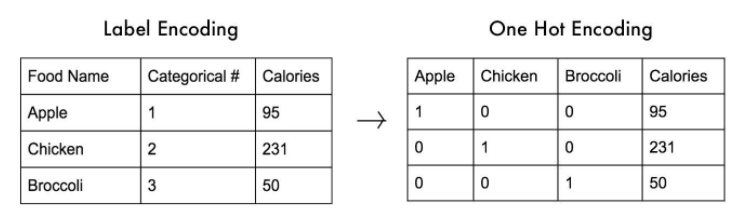

___

___

#### Manual Olarak 

In [46]:
# Kategorik ve numerik feature ları belirleyelim
cat_cols = ["Sex","Embarked","Unvan"]
num_cols = ['Pclass', 'Age','SibSp','Parch','Family','Fare']

In [47]:
# stringIndexer
# Kategorik sütunları girdi olarak alır ve çıkış sütununa herbirine "_index" yazar.
stringIndexer = StringIndexer(inputCols=cat_cols, outputCols=[x + "_index" for x in cat_cols])

In [48]:
# encoder / get_dummy
# stringIndexer'ın çıktısını (kategorik+"_index") alır ve çıktı olarak sonuna "_ohe" OneHotEncoder ifadesini ekler.
encoder = OneHotEncoder(inputCols=stringIndexer.getOutputCols(), outputCols=[x + "_ohe" for x in cat_cols], dropLast=False)

In [49]:
# Şimdi sırası ile uygulayalım.
df = stringIndexer.fit(df).transform(df)

In [50]:
df = encoder.fit(df).transform(df)

In [51]:
assembler = VectorAssembler(
  inputCols= ['Pclass', 
              'Age',
              'Family',
              'Fare',
              'Sex_ohe',
              'Embarked_ohe',
              'Unvan_ohe'],
    
    outputCol="features")

In [52]:
df = assembler.transform(df)

In [53]:
# Şimdisonuçları görelim.
df.select("features", "Survived",'Sex_ohe','Embarked_ohe','Unvan_ohe').show(truncate = False)

+--------------------------------------------------------+--------+-------------+-------------+-------------+
|features                                                |Survived|Sex_ohe      |Embarked_ohe |Unvan_ohe    |
+--------------------------------------------------------+--------+-------------+-------------+-------------+
|(13,[0,1,2,3,4,6,9],[3.0,22.0,2.0,7.25,1.0,1.0,1.0])    |0       |(2,[0],[1.0])|(3,[0],[1.0])|(4,[0],[1.0])|
|(13,[0,1,2,3,5,7,11],[1.0,38.0,2.0,71.2833,1.0,1.0,1.0])|1       |(2,[1],[1.0])|(3,[1],[1.0])|(4,[2],[1.0])|
|(13,[0,1,2,3,5,6,10],[3.0,26.0,1.0,7.925,1.0,1.0,1.0])  |1       |(2,[1],[1.0])|(3,[0],[1.0])|(4,[1],[1.0])|
|(13,[0,1,2,3,5,6,11],[1.0,35.0,2.0,53.1,1.0,1.0,1.0])   |1       |(2,[1],[1.0])|(3,[0],[1.0])|(4,[2],[1.0])|
|(13,[0,1,2,3,4,6,9],[3.0,35.0,1.0,8.05,1.0,1.0,1.0])    |0       |(2,[0],[1.0])|(3,[0],[1.0])|(4,[0],[1.0])|
|(13,[0,1,2,3,4,8,9],[3.0,28.0,1.0,8.4583,1.0,1.0,1.0])  |0       |(2,[0],[1.0])|(3,[2],[1.0])|(4,[0],[1.0])|
|(13,[0,1,

**Örneğin**<br>
'Pclass' 1.0<br>
'Age' 38.0<br>
'Family' 2.0<br>
'Fare' 71.2833<br>
'Sex_ohe' 1.0<br>
'Embarked_ohe' 1.0<br>
'Unvan_ohe' 1.0<br>
                                                     
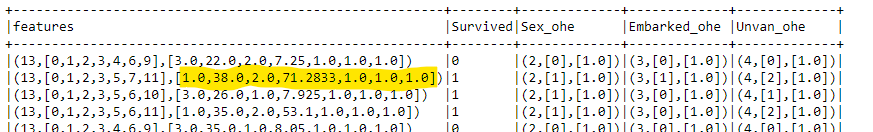

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Model Train with PySpark</font></span> <a id="16"></a>

In [54]:
# Satır sayısı
df.count()

1309

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">How to divide the data with limit()</font></span> <a id="16.1"></a>

In [55]:
# Dataframe in ilk 891 satırı train datasıdır. Yani içinde "Survived" değerli olan satırlar.
final_train_df = df.select("features", "Survived").limit(891)

In [56]:
# Burada veriyi bölerken manual olarak böldük. 1309-891=418. Tersten ilk 418 satırı aldım.
df = df.withColumn('index', F.monotonically_increasing_id())
final_test_df = df.select("features").sort('index', ascending=False).limit(418)

In [57]:
final_train_df.count(),final_test_df.count()

(891, 418)

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">randomSplit()</font></span> <a id="16.2"></a>

In [58]:
# "final_train_df" datasını kendi içerisinde bölüyorum.
train_df,test_df = final_train_df.randomSplit([0.75,0.25],seed =42)

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">LogisticRegression Model</font></span> <a id="16.3"></a>

In [59]:
# Parametreler
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Survived", featuresCol="features")

lrModel = lr.fit(train_df)
lr_prediction = lrModel.transform(test_df)
lr_prediction.show()

+--------------------+--------+--------------------+--------------------+----------+
|            features|Survived|       rawPrediction|         probability|prediction|
+--------------------+--------+--------------------+--------------------+----------+
|(13,[0,1,2,3,4,6,...|       1|[-0.1461474925305...|[0.46352802112482...|       1.0|
|(13,[0,1,2,3,4,6,...|       1|[-0.1538317586142...|[0.46161772103630...|       1.0|
|(13,[0,1,2,3,4,6,...|       0|[-0.1019933711713...|[0.47452373842702...|       1.0|
|(13,[0,1,2,3,4,6,...|       0|[-0.1021240377731...|[0.47449115669290...|       1.0|
|(13,[0,1,2,3,4,6,...|       1|[-0.1090929232056...|[0.47275378587674...|       1.0|
|(13,[0,1,2,3,4,6,...|       0|[-0.1306964680462...|[0.46737231410434...|       1.0|
|(13,[0,1,2,3,4,6,...|       0|[-0.4432147414880...|[0.39097522786520...|       1.0|
|(13,[0,1,2,3,4,6,...|       0|[0.15380123439528...|[0.53837469286831...|       0.0|
|(13,[0,1,2,3,4,6,...|       1|[0.16012408885748...|[0.5399457089

In [60]:
# Metrikler
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# ROC eğrisi değeri
bcEvaluator = BinaryClassificationEvaluator(metricName="areaUnderROC",labelCol = "Survived")
print(f"Area under ROC curve: {bcEvaluator.evaluate(lr_prediction)}")

# Accuracy skoru
mcEvaluator = MulticlassClassificationEvaluator(metricName="accuracy",labelCol = "Survived",predictionCol='prediction')
print(f"Accuracy: {mcEvaluator.evaluate(lr_prediction)}")

# Harmonic F1 skoru
mcEvaluator = MulticlassClassificationEvaluator(metricName="f1",labelCol = "Survived",predictionCol='prediction')
print(f"F1- Score: {mcEvaluator.evaluate(lr_prediction)}")

Area under ROC curve: 0.863686466625842
Accuracy: 0.7903225806451613
F1- Score: 0.7911061237890363


___

#### Aşağıdaki kod üzerinde çalışmakta fayda var. Şu an bir çıktı alamadık. Kendi kodumuza uydurmakta fayda var.
#### MulticlassMetrics

___

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">DecisionTreeClassifier Model</font></span> <a id="16.4"></a>

In [61]:
# Paramereler
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol="Survived", featuresCol="features")

dtModel = dt.fit(train_df)
dt_prediction = dtModel.transform(test_df)
dt_prediction.show()

+--------------------+--------+-------------+--------------------+----------+
|            features|Survived|rawPrediction|         probability|prediction|
+--------------------+--------+-------------+--------------------+----------+
|(13,[0,1,2,3,4,6,...|       1|  [34.0,19.0]|[0.64150943396226...|       0.0|
|(13,[0,1,2,3,4,6,...|       1|  [34.0,19.0]|[0.64150943396226...|       0.0|
|(13,[0,1,2,3,4,6,...|       0|    [5.0,9.0]|[0.35714285714285...|       1.0|
|(13,[0,1,2,3,4,6,...|       0|    [5.0,9.0]|[0.35714285714285...|       1.0|
|(13,[0,1,2,3,4,6,...|       1|  [34.0,19.0]|[0.64150943396226...|       0.0|
|(13,[0,1,2,3,4,6,...|       0|  [34.0,19.0]|[0.64150943396226...|       0.0|
|(13,[0,1,2,3,4,6,...|       0|  [34.0,19.0]|[0.64150943396226...|       0.0|
|(13,[0,1,2,3,4,6,...|       0|    [5.0,9.0]|[0.35714285714285...|       1.0|
|(13,[0,1,2,3,4,6,...|       1|    [5.0,9.0]|[0.35714285714285...|       1.0|
|(13,[0,1,2,3,4,6,...|       1|    [5.0,9.0]|[0.35714285714285..

In [62]:
# Metrikler

# ROC eğrisi değeri
bcEvaluator = BinaryClassificationEvaluator(metricName="areaUnderROC",labelCol = "Survived")
print(f"Area under ROC curve: {bcEvaluator.evaluate(dt_prediction)}")

# Accuracy skoru
mcEvaluator = MulticlassClassificationEvaluator(metricName="accuracy",labelCol = "Survived",predictionCol='prediction')
print(f"Accuracy: {mcEvaluator.evaluate(dt_prediction)}")

# Harmonic F1 skoru
mcEvaluator = MulticlassClassificationEvaluator(metricName="f1",labelCol = "Survived",predictionCol='prediction')
print(f"F1- Score: {mcEvaluator.evaluate(dt_prediction)}")

Area under ROC curve: 0.6657072872014698
Accuracy: 0.7741935483870968
F1- Score: 0.7728509607892498


___

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">RandomForestClassifier Model</font></span> <a id="16.5"></a>

In [63]:
# Paramereler
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol="Survived", featuresCol="features")

rfModel = rf.fit(train_df)
rf_prediction = rfModel.transform(test_df)
rf_prediction.show()

+--------------------+--------+--------------------+--------------------+----------+
|            features|Survived|       rawPrediction|         probability|prediction|
+--------------------+--------+--------------------+--------------------+----------+
|(13,[0,1,2,3,4,6,...|       1|[14.3622460716880...|[0.71811230358440...|       0.0|
|(13,[0,1,2,3,4,6,...|       1|[12.8576326822579...|[0.64288163411289...|       0.0|
|(13,[0,1,2,3,4,6,...|       0|[14.8415113880576...|[0.74207556940288...|       0.0|
|(13,[0,1,2,3,4,6,...|       0|[14.8415113880576...|[0.74207556940288...|       0.0|
|(13,[0,1,2,3,4,6,...|       1|[12.8576326822579...|[0.64288163411289...|       0.0|
|(13,[0,1,2,3,4,6,...|       0|[13.7041257993357...|[0.68520628996678...|       0.0|
|(13,[0,1,2,3,4,6,...|       0|[14.3485702437801...|[0.71742851218900...|       0.0|
|(13,[0,1,2,3,4,6,...|       0|[15.3885389478872...|[0.76942694739436...|       0.0|
|(13,[0,1,2,3,4,6,...|       1|[12.8576326822579...|[0.6428816341

In [64]:
# Metrikler

# ROC eğrisi değeri
bcEvaluator = BinaryClassificationEvaluator(metricName="areaUnderROC",labelCol = "Survived")
print(f"Area under ROC curve: {bcEvaluator.evaluate(rf_prediction)}")

# Accuracy skoru
mcEvaluator = MulticlassClassificationEvaluator(metricName="accuracy",labelCol = "Survived",predictionCol='prediction')
print(f"Accuracy: {mcEvaluator.evaluate(rf_prediction)}")

# Harmonic F1 skoru
mcEvaluator = MulticlassClassificationEvaluator(metricName="f1",labelCol = "Survived",predictionCol='prediction')
print(f"F1- Score: {mcEvaluator.evaluate(rf_prediction)}")

Area under ROC curve: 0.8722596448254748
Accuracy: 0.8010752688172043
F1- Score: 0.7980901775291245


___

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Sonuç</font></span> <a id="17"> </a>

Bu notebook içerisindeki tüm kodlar @Bünyamin Hocam'ın yoğun emek harcayarak yazdığı kodlardır.<br>
Dilerseniz PySpark kütüphanesinin dökümanlarını ve bu konu üzerinde forumlarda yer alan tartışmaları takip edebilirsiniz.<br>
NLP alanında sıkça karşımıza çıkacak olan bu dili öğrenmek elzemdir.<br>
Tanıtım ve temel kodların açıklandığı bu notebooka ek olarak, Python ile makine öğrenmesi yaparken uygulanan tüm kodlar jenere edilebilir. (Gridsearch, cross validation vesaire)<br>
İlgili sorularınızı, önerilerinizi ve geri beslemelerinizş aşağıdaki iletişim bilgilerinden bizlere ulaşarak iletebilrisiniz:<br>
- [Bünyamin Hoca Linkedin](https://www.linkedin.com/in/bunyaminpolat/)
- [Bünyamin Hoca GitHub](https://github.com/bunyamin-polat)
- [Bünyamin Hoca Mail](muhendisbp@hotmail.com)
- [Bünyamin Hoca Kaggle](https://www.kaggle.com/bunyaminpolat)
<br>

* [Emir Linkedin](https://www.linkedin.com/in/emirhan-bozdogan/)
* [Emir GitHub](https://github.com/emir1031)
* [Emir Mail](emrhn1031@gmail.com)
* [Emir Kaggle](https://www.kaggle.com/emrhn1031)

<img src="https://i.ytimg.com/vi/fizFooxxpBo/hqdefault.jpg" alt="J.Society's logo" style=""/>